In [38]:
# Import packages for data understanding and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
np.random.seed(42)

### Get the data

In [2]:
data = pd.read_csv('../data/interim/marketing_data_eda_output.csv')
data.head()

,Education,Marital_Status,Income,Days_Since_Enrolled,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,HasKid,HasTeen,Age
0,Bachelor,Divorced,84835.0,2378,0,189,104,379,111,189,...,0,0,0,0,1,0,SP,0,0,50
1,Bachelor,Single,57091.0,2379,0,464,5,64,7,0,...,0,0,0,1,1,0,CA,0,0,59
2,Bachelor,Married,67267.0,2412,0,134,11,59,15,2,...,0,0,0,0,0,0,US,0,1,62
3,Bachelor,Together,32474.0,2414,0,10,0,1,0,0,...,0,0,0,0,0,0,AU,1,1,53
4,Bachelor,Single,21474.0,2447,0,6,16,24,11,0,...,0,0,0,0,1,0,SP,1,0,31


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2214 non-null   object 
 1   Marital_Status       2214 non-null   object 
 2   Income               2214 non-null   float64
 3   Days_Since_Enrolled  2214 non-null   int64  
 4   Recency              2214 non-null   int64  
 5   MntWines             2214 non-null   int64  
 6   MntFruits            2214 non-null   int64  
 7   MntMeatProducts      2214 non-null   int64  
 8   MntFishProducts      2214 non-null   int64  
 9   MntSweetProducts     2214 non-null   int64  
 10  MntGoldProds         2214 non-null   int64  
 11  NumDealsPurchases    2214 non-null   int64  
 12  NumWebPurchases      2214 non-null   int64  
 13  NumCatalogPurchases  2214 non-null   int64  
 14  NumStorePurchases    2214 non-null   int64  
 15  NumWebVisitsMonth    2214 non-null   i

### Answering some questions

In this section, we will perform statistical analysis to answer the following questions. For each question, we will provide a brief explanation of the findings, suitable for non-technical users:
1. What factors are significantly related to the number of store purchases?
2. Does US fare significantly better than the Rest of the World in terms of total purchases?
3. Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statemenet using an appropriate statistical test
4. Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?
5. Is there a significant relationship between geographical regional and success of a campaign?

#### Question 1: What factors are significantly related to the number of store purchases?

For this question, we will build a correlation matrix to find correlation coefficient for every features in the dataset. Based on those coefficients we will be able to plot and determine the most significant factors(positive and negative) related to the number of store purchases

In [7]:
q1_data = pd.get_dummies(data, columns=['Education', 'Marital_Status', 'Country'],
                        drop_first=True, prefix=['Education', 'Marital_Status', 'Country'],
                        prefix_sep='_')
q1_data.head()

,Income,Days_Since_Enrolled,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Country_CA,Country_DE,Country_IN,Country_ME,Country_SA,Country_SP,Country_US
0,84835.0,2378,0,189,104,379,111,189,218,1,...,0,0,0,0,0,0,0,0,1,0
1,57091.0,2379,0,464,5,64,7,0,37,1,...,1,0,0,1,0,0,0,0,0,0
2,67267.0,2412,0,134,11,59,15,2,30,1,...,0,0,0,0,0,0,0,0,0,1
3,32474.0,2414,0,10,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,21474.0,2447,0,6,16,24,11,0,34,2,...,1,0,0,0,0,0,0,0,1,0


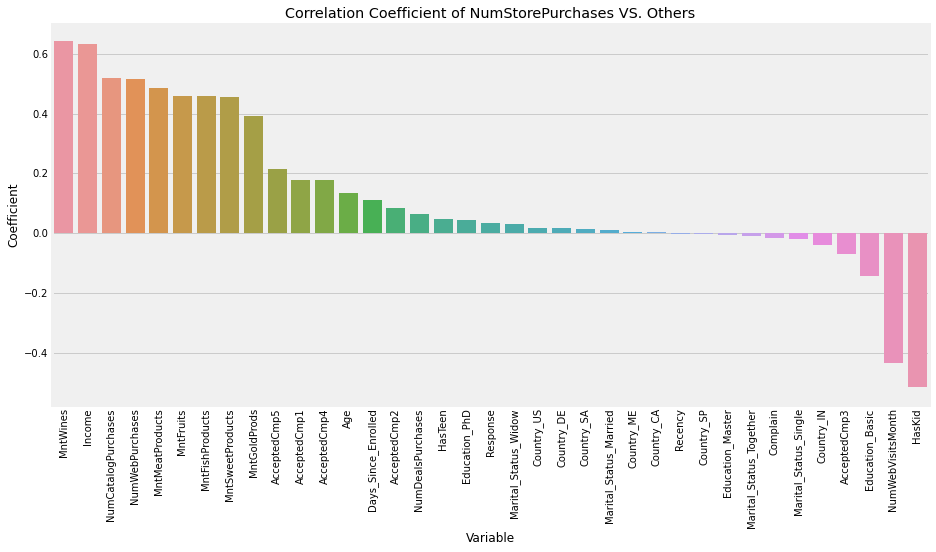

In [21]:
correlation_coeff = q1_data.corr()['NumStorePurchases'].sort_values(ascending=False)[1:]

fig = plt.subplots(figsize=(14, 7))
sns.barplot(correlation_coeff.index, correlation_coeff)
plt.xticks(rotation=90)
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.title('Correlation Coefficient of NumStorePurchases VS. Others')
plt.show()

From the chart, we can conclude that the 6 factors are most significantly related to number of store purchases. Among the 6 factors:
- Positive effect: **MntWines**, **Income**, **NumCatalogPurchases**, and **NumWebPurchases** have a positive effect on the number of store purchases in decreasing order. This means that as the values of these variable increase, the number of store purchases also increases, with **MntWines** having the largest effect on the number of store purchases
- Negative effect: On the other hand, **HasKid** and **NumWebVisitsMonth** have a negative effect on the number of store purchases in decreasing order. This means that as the values of these variables increase, the number of store purchases decreases, with **NumWebVisitsMonth** having the largest negative effect on the number of store purchases

#### Question 2: Does US fare significantly better than the Rest of the World in terms of total purchases

For this question, we will tabulate the total purchases of each country. Then we will visualize this information for US as compared to the rest of the world

In [24]:
q2_data = data.loc[:, ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                      'NumStorePurchases', 'Country']]
q2_data = q2_data.groupby('Country').sum().sum(axis=1).sort_values(ascending=False)
q2_data

Country
SP    15992
SA     5113
CA     4065
AU     2156
IN     2098
US     1743
DE     1731
ME       59
dtype: int64

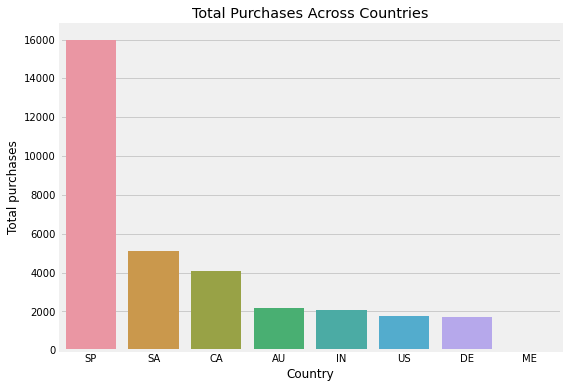

In [26]:
fig = plt.subplots(figsize=(8, 6))
sns.barplot(q2_data.index, q2_data)
plt.ylabel('Total purchases')
plt.xlabel('Country')
plt.title('Total Purchases Across Countries')
plt.show()

From chart above, we can clearly see that the US is third to last in terms of total purchases, only ahead of Mexico and Germany. Thus, US definitely does not fare better than the rest of the world in terms of total purchases

Let's take a look if the US fares better in terms of average purchases per customer

In [27]:
num_cust = data['Country']
num_cust = num_cust.value_counts()

avg_purchase = (q2_data / num_cust.to_numpy()).sort_values(ascending=False)
avg_purchase

Country
ME    19.666667
DE    16.177570
CA    15.281955
SA    15.217262
US    15.025862
AU    14.666667
SP    14.644689
IN    14.272109
dtype: float64

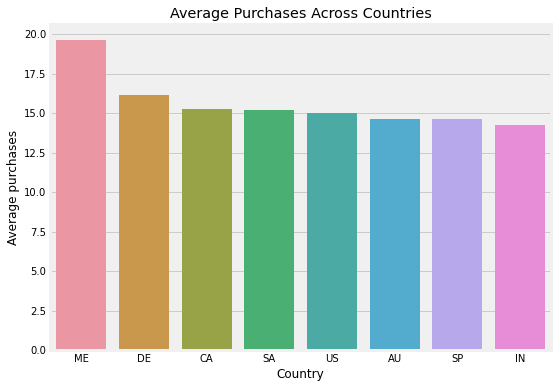

In [28]:
fig = plt.subplots(figsize=(8, 6))
sns.barplot(avg_purchase.index, avg_purchase)
plt.ylabel('Average purchases')
plt.xlabel('Country')
plt.title('Average Purchases Across Countries')
plt.show()

From this, we can also see that the US does not fare better than the rest of the world, being significantly behind Mexico in terms of average purchases per customer, and very close to all other countries

Let's take a look if the US fares better in terms of total purchases amounts. For this, we will total the values in the 6 columns, **MntWines**, **MntFruits**, **MntMeatProducts**, **MntFishProducts**, **MntSweetProducts**, and **MntGoldProds**

In [29]:
total_value = data[['MntWines', 'MntFruits', 'MntMeatProducts',
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'Country']]
total_value = total_value.groupby('Country').sum().sum(axis=1).sort_values(ascending=False)
total_value

Country
SP    657704
SA    211049
CA    167403
AU     85576
IN     77806
DE     73198
US     67546
ME      3122
dtype: int64

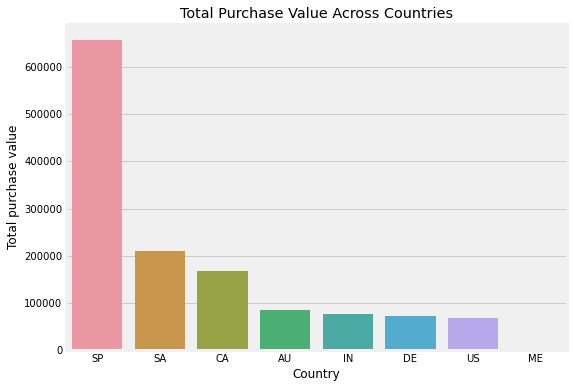

In [30]:
fig = plt.subplots(figsize=(8, 6))
sns.barplot(total_value.index, total_value)
plt.ylabel('Total purchase value')
plt.xlabel('Country')
plt.title('Total Purchase Value Across Countries')
plt.show()

In terms of total purchase value, US is second to last, only ahead of Mexico. Thus, we can conclude with certainty that US does not fare better than the rest of the world in terms of total purchases

#### Question 3: Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount of gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

For this question, we will first tabulate the data (number of in store purchases) for 2 population groups, those with above average spending on gold, and thus with average or lower spending on gold.

Then, we will perform a T-test for population means to determine if there is statistical evidence to support the claim that people who spent an above average amount of gold also has more in store purchases

We first set up the hypothesis test:

Ho: Store purchases of people who spend more on gold <= store purchases of people who spend less on gold

Ha: Store purchases of people who spend more on gold > store purchases of people who spend less on gold

Next, we check if the 2 samples have equal variances

In [32]:
gold_purchase = data[['MntGoldProds', 'NumStorePurchases']]
gold_purchase['AboveAvg'] = np.where(gold_purchase['MntGoldProds'] > gold_purchase['MntGoldProds'].mean(), 'Yes', 'No')
gold_purchase.head()

,MntGoldProds,NumStorePurchases,AboveAvg
0,218,6,Yes
1,37,7,No
2,30,5,No
3,0,2,No
4,34,2,No


In [34]:
above_avg_gold_buyers = gold_purchase[gold_purchase['AboveAvg'] == 'Yes']['NumStorePurchases']
non_above_avg_gold_buyers = gold_purchase[gold_purchase['AboveAvg'] == 'No']['NumStorePurchases']

print(scipy.stats.levene(above_avg_gold_buyers, non_above_avg_gold_buyers))

LeveneResult(statistic=18.93070525970288, pvalue=1.4171532169420453e-05)


Based on the result above, the P-value is very small, thus we reject the null hypothesis that the variances are equal.

Next, we will perform 2 sample T-test for Unequal Variances

In [36]:
def t_test(x, y, alternative='equal'):
    _, double_p = ttest_ind(x, y, equal_var=False)
    
    if alternative == 'equal':
        pval = double_p
    elif alternative == 'greater':
        if np.mean(x) > np.mean(y):
            pval = double_p / 2
        else:
            pval = 1.0 - double_p / 2
    elif alternative == 'less':
        if np.mean(x) < np.mean(y):
            pval = double_p / 2
        else:
            pval = 1.0 - double_p / 2
            
    return pval

print('At 0.05 significance level, \n')

p = t_test(above_avg_gold_buyers, non_above_avg_gold_buyers, alternative='equal')

if p > 0.05:
    print('For 2-tailed test:\nWith P-Value of', p, 'we fail to reject the null hypothesis. Population means are equal\n')
else:
    print('For 2-tailed test:\nWith P-Value of', p, 'null hypothesis is rejected. Population means are not equal\n')
    
p2 = t_test(above_avg_gold_buyers, non_above_avg_gold_buyers, alternative='greater')

if p2 > 0.05:
    print('For 1-tailed test:\nWith P-Value of', p, 'we fail to reject the null hypothesis. \nStore purchases of people who spend more on gold < store purchases of people who spend less')
else:
    print('For 1-tailed test:\nWith P-Value of', p, 'null hypothesis is rejected. \nStore purchases of people who spend more on gold > store purchases of people who spend less')

At 0.05 significance level, 

For 2-tailed test:
With P-Value of 9.660299353854847e-85 null hypothesis is rejected. Population means are not equal

For 1-tailed test:
With P-Value of 9.660299353854847e-85 null hypothesis is rejected. 
Store purchases of people who spend more on gold > store purchases of people who spend less


Based on the hypothesis test, we can conclude that store purchases of people who spend more on gold is greater than store purchases of people who spend less on gold. Thus, the supervisor's claim is justified statistically. **But**, the high number in store purchases by people who spend more on gold might also be driven by other factors, especially **Income**

#### Question 4: Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish?

For this question, we will build a multiple linear regression model to predict the amount spent on fish products. Based on the coefficients of the model, we will be able to plot and determine the most significant factors(positive and negative) related to the amount spent on fish products, and identify if married PhD candidates is a strong factor

In [37]:
def norm_func(x):
    data = (x - x.min()) / (x.max() - x.min())
    return (data)

q4_data = pd.get_dummies(data, columns=['Education', 'Marital_Status', 'Country'],
                        drop_first=True, prefix=['Education', 'Marital_Status', 'Country'],
                        prefix_sep='_')

scaled_q4_data = norm_func(q4_data.iloc[:, :])
scaled_q4_data.head()

,Income,Days_Since_Enrolled,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Country_CA,Country_DE,Country_IN,Country_ME,Country_SA,Country_SP,Country_US
0,0.517250,0.018598,0.0,0.126591,0.522613,0.219710,0.428571,0.721374,0.679128,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.344570,0.020029,0.0,0.310784,0.025126,0.037101,0.027027,0.000000,0.115265,0.066667,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.407906,0.067239,0.0,0.089752,0.055276,0.034203,0.057915,0.007634,0.093458,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.191352,0.070100,0.0,0.006698,0.000000,0.000580,0.000000,0.000000,0.000000,0.066667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.122888,0.117310,0.0,0.004019,0.080402,0.013913,0.042471,0.000000,0.105919,0.133333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
scaled_q4_data.columns

Index(['Income', 'Days_Since_Enrolled', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'HasKid', 'HasTeen', 'Age',
       'Education_Basic', 'Education_Master', 'Education_PhD',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'Country_CA',
       'Country_DE', 'Country_IN', 'Country_ME', 'Country_SA', 'Country_SP',
       'Country_US'],
      dtype='object')

In [43]:
q4_model = smf.ols('MntFishProducts ~ Income + Days_Since_Enrolled + Recency + MntWines + MntFruits + MntMeatProducts +\
                   MntSweetProducts + MntGoldProds + NumDealsPurchases + NumWebPurchases + NumCatalogPurchases +\
                   NumStorePurchases + NumWebVisitsMonth + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + AcceptedCmp1 +\
                   AcceptedCmp2 + Response + Complain + HasKid + HasTeen + Age + Education_Basic + Education_Master +\
                   Education_PhD + Marital_Status_Married + Marital_Status_Single + Marital_Status_Together + Marital_Status_Widow +\
                   Country_CA + Country_DE + Country_IN + Country_ME + Country_SA + Country_SP + Country_US +\
                   Marital_Status_Married*Education_PhD', data=scaled_q4_data).fit()
q4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MntFishProducts   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     66.09
Date:                Sun, 09 May 2021   Prob (F-statistic):               0.00
Time:                        02:19:09   Log-Likelihood:                 1149.2
No. Observations:                2214   AIC:                            -2220.
Df Residuals:                    2175   BIC:                            -1998.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.0207      0.027      0.754      0.451      -0.033       0.075
Income                                   0.0753      0.049      1.539      0.124      -0.021       0.171
Days_Since_Enrolled                      0.0276      0.013      2.204      0.028       0.003       0.052
Recency                                 -0.0118      0.011     -1.081      0.280      -0.033       0.010
MntWines                                -0.0189      0.026     -0.726      0.468      -0.070       0.032
MntFruits                                0.2284      0.021     10.786      0.000       0.187       0.270
MntMeatProducts                          0.2121      0.043      4.955      0.000       0.128       0.296
MntSweetProducts                         0.2749      0.027     10.218      0.000       0.222       0.328
MntGoldProds                             0.1542      0.024      6.481      0.000       0.108       0.201
NumDealsPurchases                       -0.0650      0.032     -2.041      0.041      -0.127      -0.003
NumWebPurchases                          0.0404      0.044      0.926      0.354      -0.045       0.126
NumCatalogPurchases                      0.1570      0.053      2.986      0.003       0.054       0.260
NumStorePurchases                        0.0580      0.019      2.981      0.003       0.020       0.096
NumWebVisitsMonth                       -0.1049      0.044     -2.394      0.017      -0.191      -0.019
AcceptedCmp3                            -0.0145      0.013     -1.131      0.258      -0.040       0.011
AcceptedCmp4                            -0.0177      0.014     -1.266      0.206      -0.045       0.010
AcceptedCmp5                            -0.0657      0.015     -4.257      0.000      -0.096      -0.035
AcceptedCmp1                             0.0698      0.015      4.725      0.000       0.041       0.099
AcceptedCmp2                            -0.0219      0.029     -0.757      0.449      -0.079       0.035
Response                                -0.0139      0.011     -1.298      0.194      -0.035       0.007
Complain                                -0.0139      0.032     -0.434      0.664      -0.077       0.049
HasKid                                  -0.0030      0.009     -0.336      0.737      -0.021       0.015
HasTeen                                 -0.0371      0.008     -4.499      0.000      -0.053      -0.021
Age                                      0.0385      0.029      1.332      0.183      -0.018       0.095
Education_Basic                          0.0062      0.021      0.294      0.769      -0.035       0.048
Education_Master                         0.0002      0.008      0.026      0.980      -0.015       0.015
Education_PhD                         

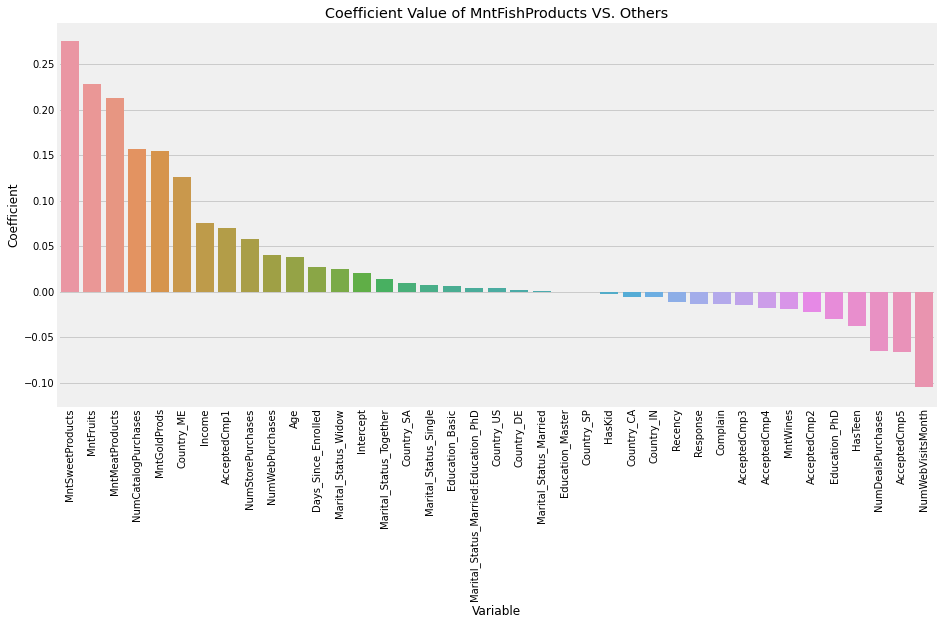

In [44]:
coeffs = q4_model.params.sort_values(ascending=False)

fig = plt.subplots(figsize=(14, 7))
sns.barplot(coeffs.index, coeffs)
plt.xticks(rotation=90)
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.title('Coefficient Value of MntFishProducts VS. Others')
plt.show()

We will arbitrarily use -0.1 and 0.1 as the cutoff for the coefficients in order to narrow down the important factors. We will also plot the coefficient of the interaction term **Marital_Status_Married:Education_PhD** for comparison

In [45]:
coeffs_narrow = coeffs[coeffs > 0.1].append(coeffs[coeffs<-0.1])
coeffs_narrow = coeffs_narrow[~(coeffs_narrow.index == 'Intercept')]
coeffs_narrow.append(coeffs[coeffs.index == 'Marital_Status_Married:Education_PhD'])

coeffs_narrow

MntSweetProducts       0.274859
MntFruits              0.228417
MntMeatProducts        0.212098
NumCatalogPurchases    0.156965
MntGoldProds           0.154190
Country_ME             0.126281
NumWebVisitsMonth     -0.104885
dtype: float64

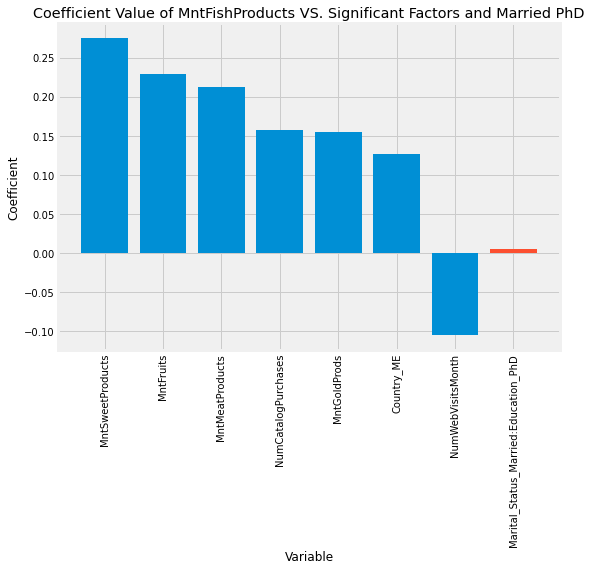

In [47]:
fig = plt.subplots(figsize=(8, 6))
plt.bar(coeffs_narrow.index, coeffs_narrow)
plt.bar('Marital_Status_Married:Education_PhD', coeffs[coeffs.index == 'Marital_Status_Married:Education_PhD'])
plt.xticks(rotation=90)
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.title('Coefficient Value of MntFishProducts VS. Significant Factors and Married PhD')
plt.show()

Based on the model above, the factors that are significantly related to the amount spent on fish are: **MntSweetProducts**, **MntFruits**, **MntMeatProducts**, **NumCatalogPurchases**, **MntGoldProds**, **Country_ME**, and **NumWebVisitsMonth**.

This means that customers who tend to spend on other products will also spend on fish products. Interestingly, customer in Mexico also tend to buy more fish.

In comparison, the interaction term of Married PhD customers have a very low coefficient. Thus, it does not have a significant relationship with the amount spent on fish